In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import pickle
import os
import colour

In [5]:
epoch = 20
#expdir = 'output/sawyer-reach-sim-2d/2019_05_23_11_51_43/eval_trajectories' # single goal, works!
#expdir = 'output/sawyer-reach-sim-2d/2019_05_23_12_39_11/eval_trajectories' # 5 training goals
#expdir = 'output/sawyer-reach-sim-2d/2019_05_23_13_06_37/eval_trajectories' # 5 training goals, reward scale X10
expdir = 'output/sawyer-reach-sim-2d/2019_06_28_15_58_15/eval_trajectories' # new branch, 5 training goals
def load_pkl(t):
    with open(os.path.join(expdir, 'task{}-epoch{}-run0.pkl'.format(t, epoch)), 'rb') as f:
        data = pickle.load(f)
    return data

#### sample rollouts

(14, 2, 84, 84) (15, 2) (15, 1)
(14, 2, 84, 84) (15, 2) (15, 1)
(14, 2, 84, 84) (15, 2) (15, 1)
goal [0.12613312 0.58095152 0.38      ]


FileNotFoundError: [Errno 2] No such file or directory: 'output/sawyer-reach-sim-2d/2019_06_28_15_58_15/eval_trajectories/task1-epoch20-run0.pkl'

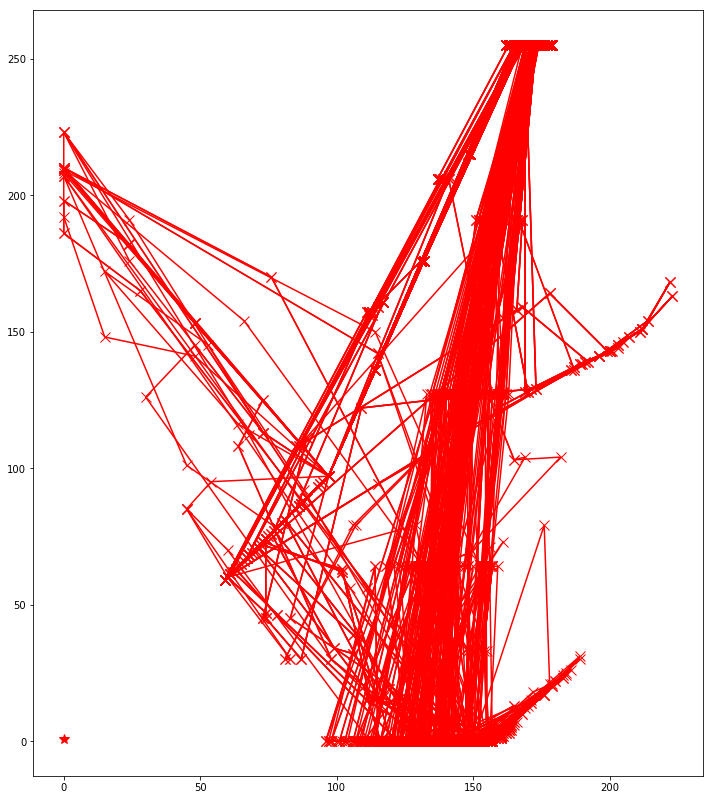

In [7]:
tasks = [0, 1, 2, 3, 4, 5] # If only 1 task, set to [0]

fig, axes = plt.subplots(1, 1, figsize=(12, 20))
#axes.set_xlim([-1.25, 1.25])
#axes.set_ylim([-1.25, 1.25])

colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for t,c in zip(tasks, colors):
    all_paths = load_pkl(t)
    alphas = [0.2, 0.5, 0.9]
    for p,a in zip(all_paths, alphas):
        states = p['observations'][1:][:,:2]
        acts = p['actions']
        rewards = p['rewards']
        print(states.shape, acts.shape, rewards.shape)
#         axes.plot(states[:, 0], states[:, 1], '-', color=c, alpha=a)
        axes.plot(states[-1, 0], states[-1, 1], '-x', markersize=10, color=c)
        axes.set(aspect='equal')
    g = all_paths[0]['goal']
    print('goal', g)
    axes.plot(g[0], g[1], '*', markersize=10, color=c)
    #axes.plot(0, 0, 'o', markersize=10, color='black')
